In [375]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from math import inf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from time import time
from pprint import pprint
from io import BytesIO

In [248]:
def savePlot(name):
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight', dpi = 300)
    buffer.seek(0) 
    with open(name + '.png', 'wb') as f:
        f.write(buffer.getvalue())


In [249]:
def pltTrend(ax, x, y):
    coefficients = np.polyfit(x, y, 1)
    slope, intercept = coefficients
    x_trend = np.linspace(min(x), max(x), 100)
    y_trend = slope * x_trend + intercept
    ax.plot(x_trend, y_trend, linewidth  = 5, color='red')

In [250]:
data = pd.read_csv("data.csv")

In [251]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [252]:
data.describe();

In [253]:
regions = data['region'].unique();

In [254]:
categ = data[['smoker', 'sex', 'region']]
dummies = pd.get_dummies(categ, dtype=int)
dummies.drop(['smoker_no', 'sex_female'], axis=1, inplace = True)
dummies;

In [255]:
data.drop(categ, axis=1, inplace=True)
data = pd.merge(data, dummies, right_index = True, left_index= True)

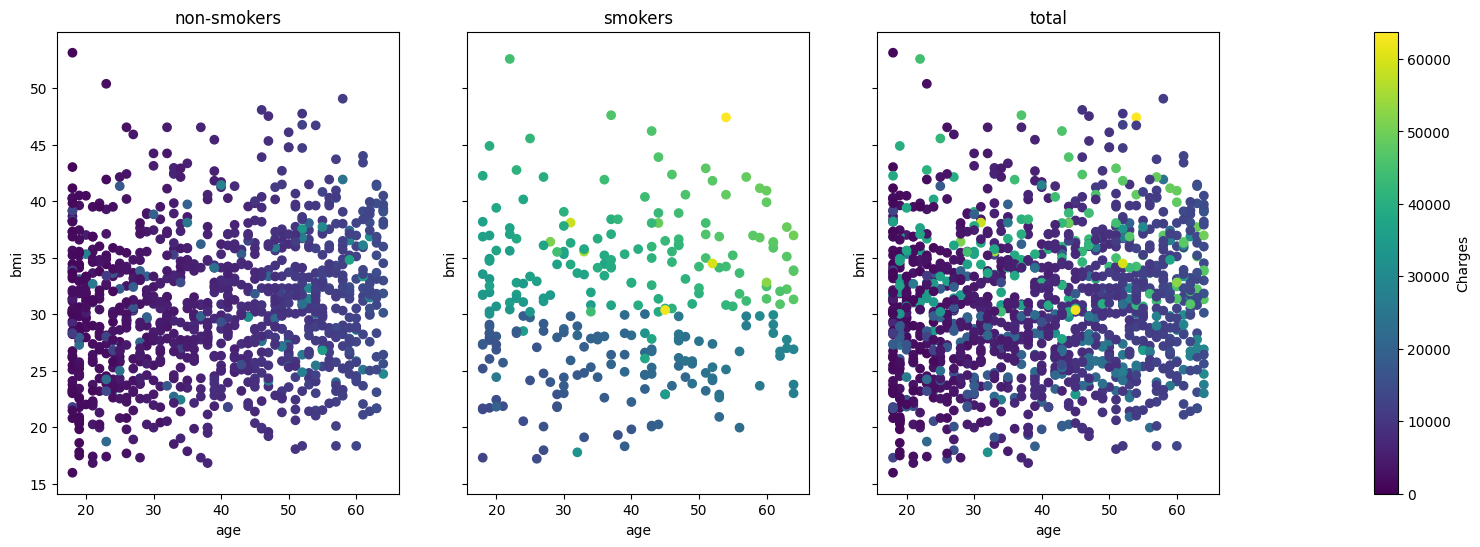

In [256]:
fig, ax = plt.subplots(1 , 3, figsize=(20, 6), sharey = True, sharex = True)
for i in range(len(ax)):
    ax[i].set_xlabel('age')
    ax[i].set_ylabel('bmi')
maxcharge = data['charges'].max()
d1 = data[data['smoker_yes'] == 0]
ax[0].scatter(x=d1['age'], y=d1['bmi'], c=d1['charges'], vmin = 0, vmax=maxcharge)
ax[0].set_title("non-smokers")

d1 = data[data['smoker_yes'] == 1]
ax[1].scatter(x=d1['age'], y=d1['bmi'], c=d1['charges'], vmin = 0, vmax=maxcharge)
ax[1].set_title("smokers")

sctotal = ax[2].scatter(x=data['age'], y=data['bmi'], c=data['charges'], vmin = 0, vmax=maxcharge)
ax[2].set_title('total');
fig.colorbar(sctotal, ax=ax, label='Charges', pad=0.1)
# plt.colorbar(ax[2] , c= d1['charges']*0.001)
savePlot('smokersVizualization')


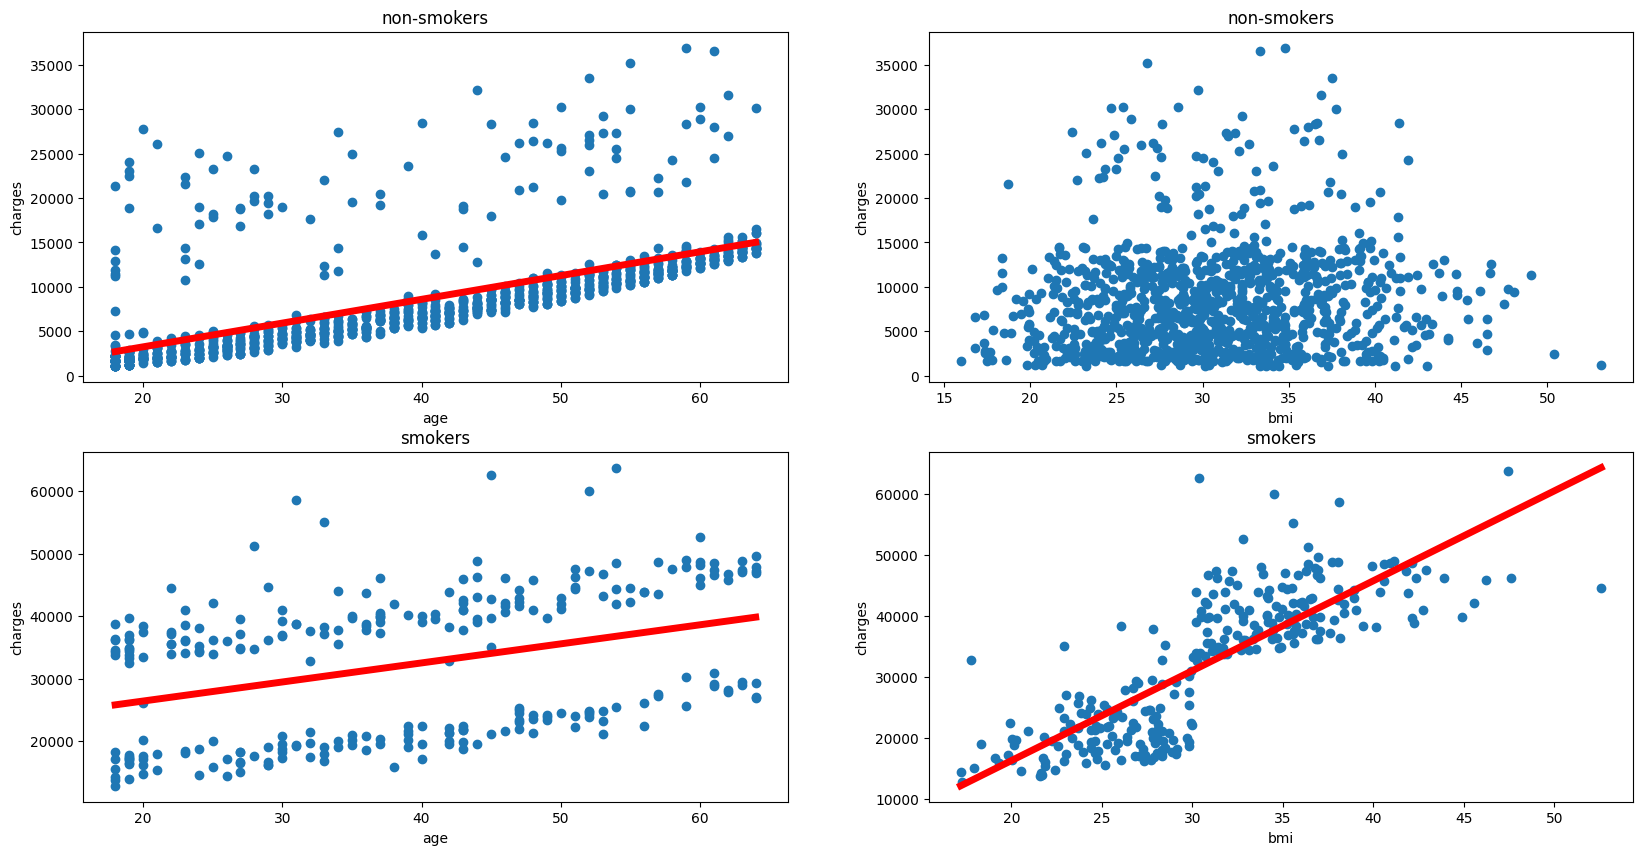

In [677]:
fig, ax = plt.subplots(2 , 2, figsize=(20, 10))

d1 = data[data['smoker_yes'] == 0]
ax[0][0].scatter(x=d1['age'], y = d1['charges'])
ax[0][0].set_xlabel('age')
ax[0][0].set_ylabel('charges')
ax[0][0].set_title("non-smokers")
pltTrend(ax[0][0], d1['age'], d1['charges'])

ax[0][1].scatter(x=d1['bmi'], y = d1['charges'])
ax[0][1].set_xlabel('bmi')
ax[0][1].set_ylabel('charges')
ax[0][1].set_title("non-smokers")

d1 = data[data['smoker_yes'] == 1]
ax[1][0].scatter(x=d1['age'], y = d1['charges'])
ax[1][0].set_xlabel('age')
ax[1][0].set_ylabel('charges')
ax[1][0].set_title("smokers")
pltTrend(ax[1][0], x=d1['age'], y = d1['charges'])


ax[1][1].scatter(x=d1['bmi'], y = d1['charges'])
ax[1][1].set_xlabel('bmi')
ax[1][1].set_ylabel('charges')
ax[1][1].set_title("smokers")
pltTrend(ax[1][1], x=d1['bmi'], y = d1['charges'])

savePlot('smokersVizualization2')


45


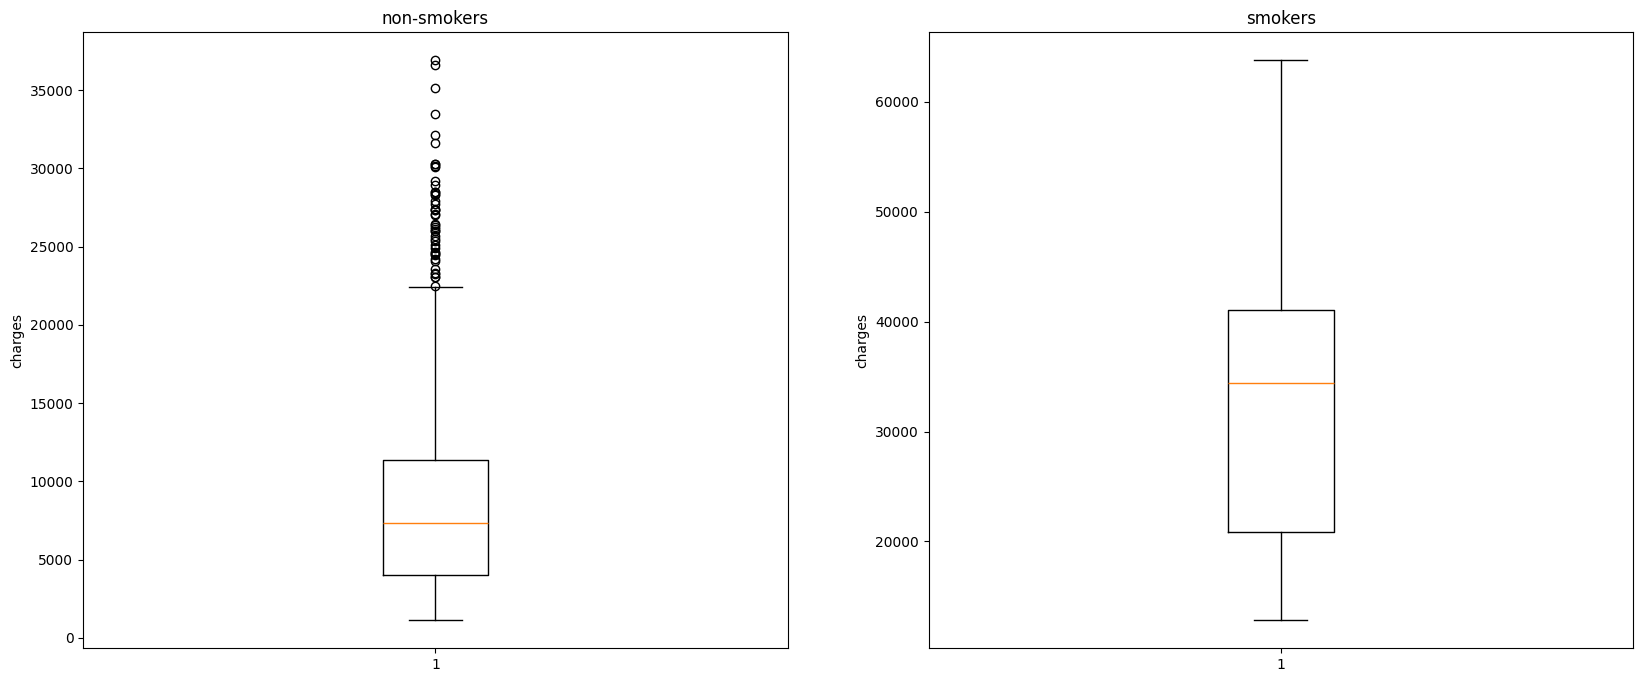

In [258]:
fig, ax = plt.subplots(1 , 2, figsize=(20, 8))

for i in range(len(ax)):
    ax[i].set_ylabel('charges')
ax[0].set_title('non-smokers')
d1 = data[data['smoker_yes'] == 0]
print(len(d1[d1['charges'] > 23000]))
ax[0].boxplot(d1['charges'])
ax[1].set_title('smokers')
d1 = data[data['smoker_yes'] == 1]
ax[1].boxplot(d1['charges']);

savePlot('smokersCharges')

region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64


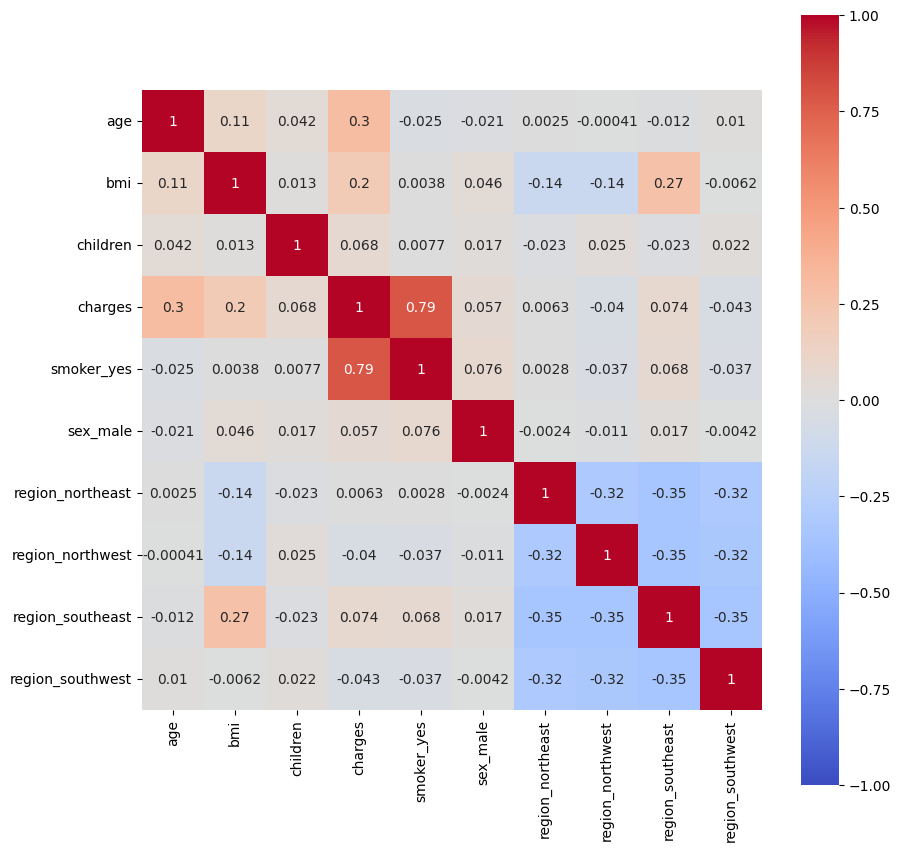

In [259]:
print(data.corr()['charges'].sort_values())
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), mask=np.zeros_like(data.corr(), dtype=np.bool), cmap=sns.color_palette("coolwarm", as_cmap=True), vmin=-1, vmax = 1,
            square=True, annot = True)
savePlot('correlations')
plt.show()


**Вывод:**
1. Стоимосьт у курильщиков в основном выше
2. Стоимость у не курящих зависит от их возраста, по bmi распределение равномерное
3. Стоимость у курильщиков зависит от bmi, по возрасту распределение равномерно
4. Стоимость не зависит от пола
5. Стоимость не зависит от количества детей
6. Стоимость не зависит от региона

In [435]:
print('smoker median', data[data['smoker_yes'] == 1]['charges'].median(),
      'non-smoker median', data[data['smoker_yes'] == 0]['charges'].median())

smoker median 34456.348450000005 non-smoker median 7345.4053


In [261]:
data = data.drop('sex_male', axis=1)
if('region' in data.columns): data = data.drop(['region'], axis = 1)
for region in regions:
    region = 'region_' + region
    if(region in data.columns): data = data.drop([region], axis = 1)
data = data.drop(['children'], axis= 1)
data

,age,bmi,charges,smoker_yes
0,19,27.900,16884.92400,1
1,18,33.770,1725.55230,0
2,28,33.000,4449.46200,0
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0
...,...,...,...,...
1333,50,30.970,10600.54830,0
1334,18,31.920,2205.98080,0
1335,18,36.850,1629.83350,0
1336,21,25.800,2007.94500,0


In [453]:
dataCopy = data.copy()

In [454]:
from sklearn.preprocessing import PolynomialFeatures

In [740]:
data = dataCopy.copy()
# data = data[data['smoker_yes'] == 1]
# data =data.drop(['smoker_yes'], axis= 1)
X = data.drop(['charges'], axis= 1)
y = data['charges']
# print(X)
X = X.to_numpy()
quad = PolynomialFeatures (degree = 2, include_bias=False)
X = quad.fit_transform(X)


In [741]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [742]:
A = X_train
y_train = y_train
X_test

array([[2.30000000e+01, 3.44000000e+01, 0.00000000e+00, ...,
        1.18336000e+03, 0.00000000e+00, 0.00000000e+00],
       [2.80000000e+01, 2.75000000e+01, 0.00000000e+00, ...,
        7.56250000e+02, 0.00000000e+00, 0.00000000e+00],
       [4.40000000e+01, 2.76450000e+01, 0.00000000e+00, ...,
        7.64246025e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.80000000e+01, 2.80000000e+01, 1.00000000e+00, ...,
        7.84000000e+02, 2.80000000e+01, 1.00000000e+00],
       [6.30000000e+01, 3.31000000e+01, 0.00000000e+00, ...,
        1.09561000e+03, 0.00000000e+00, 0.00000000e+00],
       [2.60000000e+01, 3.10650000e+01, 0.00000000e+00, ...,
        9.65034225e+02, 0.00000000e+00, 0.00000000e+00]], shape=(536, 9))

In [743]:
def normalize(A):
    return (A - np.mean(A, axis=0)) / np.std(A, axis=0)

In [744]:
A = normalize(A)
X_test_norm = normalize(X_test)
# X_test[:,2]

In [738]:
finLim = 10**(-4)
lr = 10**(-1)
impulse = 0.95

In [619]:
w_original = np.random.rand(A[0].shape[0]).astype(np.float64)
a0_original = np.random.rand(1) 
losses =[]
w, a0

(array([3805.86186054, 1759.82540593, 9930.36207368]), array([13410.31731137]))

In [620]:
def gd(w, a0, A, y_train, N, lr, finlim):
    delta = inf
    LM = 0
    try:
        i = 0
        for i in range(N):
            if abs(delta) < finLim:
                print("complete, i:", i)
                break
            y_pred = A @ w + a0
            M = mean_squared_error(y_train, y_pred)
            delta = M - LM
            if(i % 10000 == 0):
                print(i, M, delta)
            LM = M
            losses.append(M)
            error = y_pred - y_train
            w -= 2 *error @ A/802 * lr 
            a0 -= 2 * sum(error)/802 * lr
    except:
        return w, a0
    return w, a0

In [621]:
def nagd(w, a0, A, y_train, N, lr, finlim, mu):
    delta = inf
    LM = 0
    wphi_old = w
    wphi = w
    a0phi_old = a0
    a0phi = a0
    try:
        i = 0
        for i in range(N):
            
            if abs(delta) < finLim:
                print("complete, i: ", i)
                break
            wv = wphi - wphi_old
            a0v = a0phi - a0phi_old
            
            y_pred = A @ (wphi + mu* wv)+ a0phi  + mu * a0v
            M = mean_squared_error(y_train, y_pred)
            delta = M - LM
            if(i % 10000 == 0):
                print(i, M, delta)
            LM = M
            losses.append(M)
            error = y_pred - y_train
            wphi_old = wphi
            a0phi_old = a0phi
            wphi += mu * wv - 2 *error @ A/802 * lr 
            a0phi += mu * a0v - 2 * np.sum(error)/802 * lr
    except KeyboardInterrupt:
        return wphi + mu* wv, a0phi  + mu * a0v
    return wphi + mu* wv, a0phi  + mu * a0v

In [567]:
w= w_original.copy()
a0 = a0_original.copy()
start = time()
w, a0 = gd(w, a0, A, y_train, 10**8, lr, finLim)
timeDif =  time() - start
print('w: ', w, '\na0:', a0, '\ntime: ',timeDif)

0 336340566.8265224 336340566.8265224
10000 27583477.682798304 -331.06331055238843
20000 25545912.82202098 -117.1706226542592
30000 24799492.36280601 -44.19483079761267
40000 24514042.968877465 -17.247133124619722
50000 24400437.724979144 -7.081251293420792
60000 24352328.972473133 -3.141323622316122
70000 24330046.74460801 -1.5439164750277996
80000 24318533.052038845 -0.8487953506410122
90000 24311898.40221312 -0.5154541544616222
100000 24307720.97946017 -0.3368009217083454
110000 24304925.748529125 -0.23060350492596626
120000 24302984.710598838 -0.16225578635931015
130000 24301608.157963876 -0.11590416356921196
140000 24300620.616418604 -0.08347529917955399
150000 24299907.725573994 -0.060387060046195984
160000 24299391.355595157 -0.043791264295578
170000 24299016.62860102 -0.031800150871276855
180000 24298744.39664942 -0.023111362010240555
190000 24298546.495067045 -0.016805283725261688
200000 24298402.566781346 -0.012224145233631134
210000 24298297.859980732 -0.008894141763448715
2

In [749]:
w= w_original.copy()
a0 = a0_original.copy()
start = time()
w, a0 = nagd(w, a0, A, y_train, 10**8, lr, finLim, impulse)
timeDif =  time() - start
print('w: ', w, '\na0:', a0, '\ntime: ',timeDif)

0 336354006.9407769 336354006.9407769
complete, i:  4971
w:  [  -46.31918183  2904.8088877  -4155.99244459  3132.00103321
  1032.44933542   167.3510895  -3476.39236595 18622.89592614
 -4156.026081  ] 
a0: [13410.40693337] 
time:  2.4308419227600098


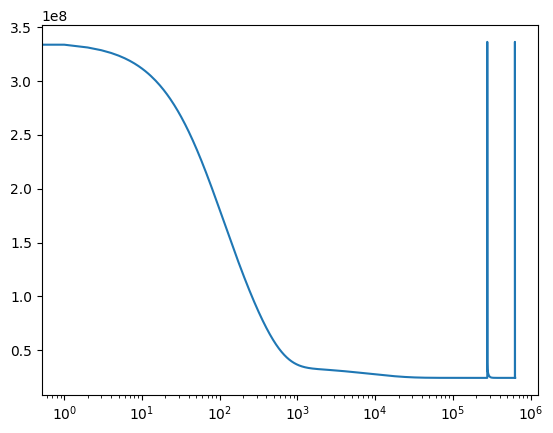

In [750]:
plt.subplot(1, 1, 1)
plt.plot(losses)
plt.xscale('log')
plt.show()


In [751]:
mean_squared_error(y_train, A @ w + a0)

24298017.72974959

In [752]:
y_pred = X_test_norm @ w + a0

In [753]:
X_test[:,0].shape

(536,)

In [754]:
mean_squared_error(y_test, y_pred)

23682468.300314356

In [755]:
r2_score(y_test, y_pred)

0.8198436678921903

In [756]:
compare = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
compare.head(5)

,Actual,Predicted
12,1826.84300,3928.449967
306,20177.67113,5172.512773
318,7421.19455,9294.120666
815,1877.92940,3597.440238
157,15518.18025,20762.774517


In [757]:
feature_names = quad.get_feature_names_out(input_features=["age", "bmi", "smoker_yes"])
feature_names

array(['age', 'bmi', 'smoker_yes', 'age^2', 'age bmi', 'age smoker_yes',
       'bmi^2', 'bmi smoker_yes', 'smoker_yes^2'], dtype=object)

std deviation: 4853.901569683523
103 / 536
1 1


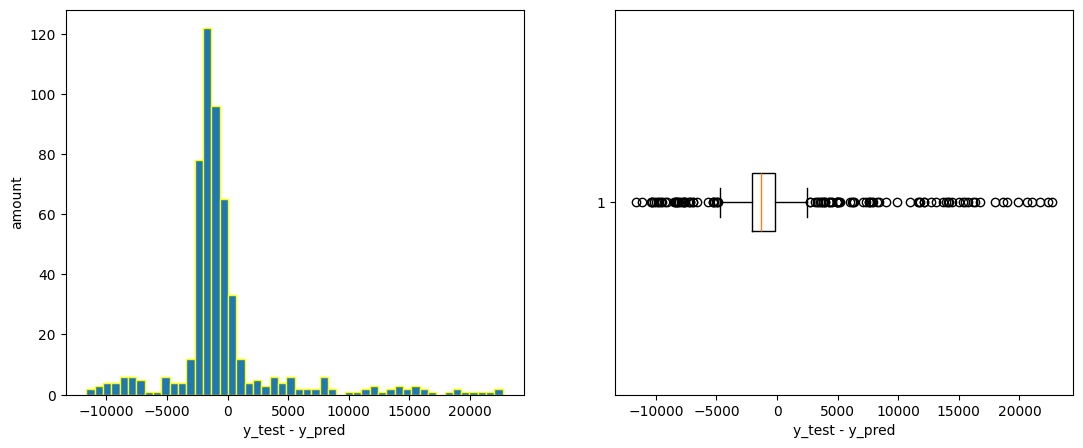

In [769]:
cd = (y_test - y_pred)
fix, ax = plt.subplots(1, 2, figsize = (13, 5), sharex = True)
ax[0].hist(cd, bins=50, edgecolor='yellow');
ax[0].set_xlabel('y_test - y_pred')
ax[0].set_ylabel('amount')
bp = ax[1].boxplot(cd, vert = False);
ax[1].set_xlabel('y_test - y_pred')
savePlot('differences')
print("std deviation:", np.std(cd))
print(len(bp['fliers'][0].get_data()[1]), '/', len(y_pred))
print(bp['whiskers'][1].get_ydata()[1],  bp['whiskers'][0].get_ydata()[1])

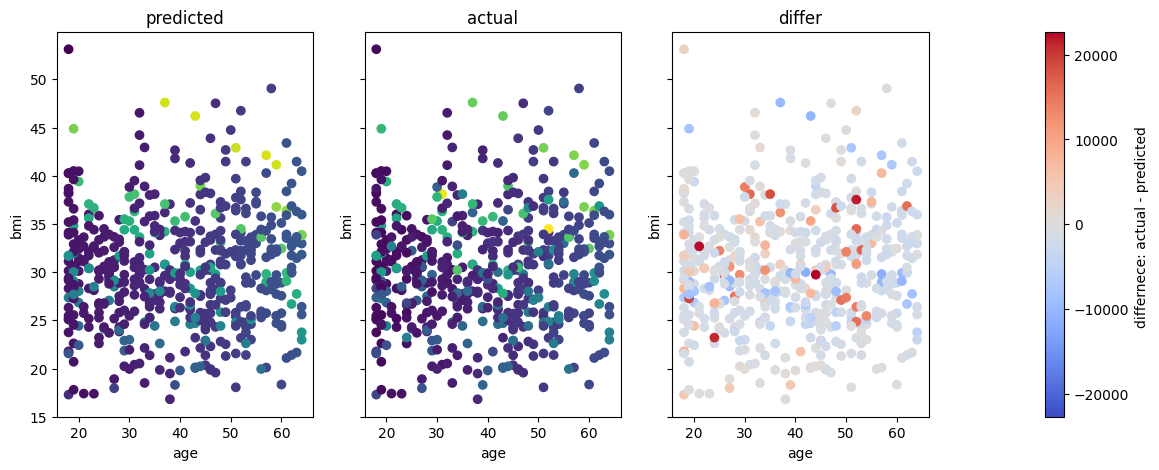

In [762]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5), sharex = True, sharey =True)
for i in range(len(ax)):
    ax[i].set_xlabel('age')
    ax[i].set_ylabel('bmi')
ax[0].set_title('predicted')
ax[0].scatter(x=X_test[:,0], y=X_test[:,1], c=y_pred*0.001, vmin = 0, vmax=60)
ax[1].set_title('actual')
ax[1].scatter(x=X_test[:,0], y=X_test[:,1], c=y_test*0.001, vmin = 0, vmax=60)
ax[2].set_title('differ')

max_abs = np.max(np.abs(cd))
sc = ax[2].scatter(x=X_test[:,0], y=X_test[:,1], c=cd, vmin = -max_abs, vmax = max_abs, cmap='coolwarm');
fig.colorbar(sc, ax=ax, label='differnece: actual - predicted ', pad=0.1)
savePlot("scatterDiffers")

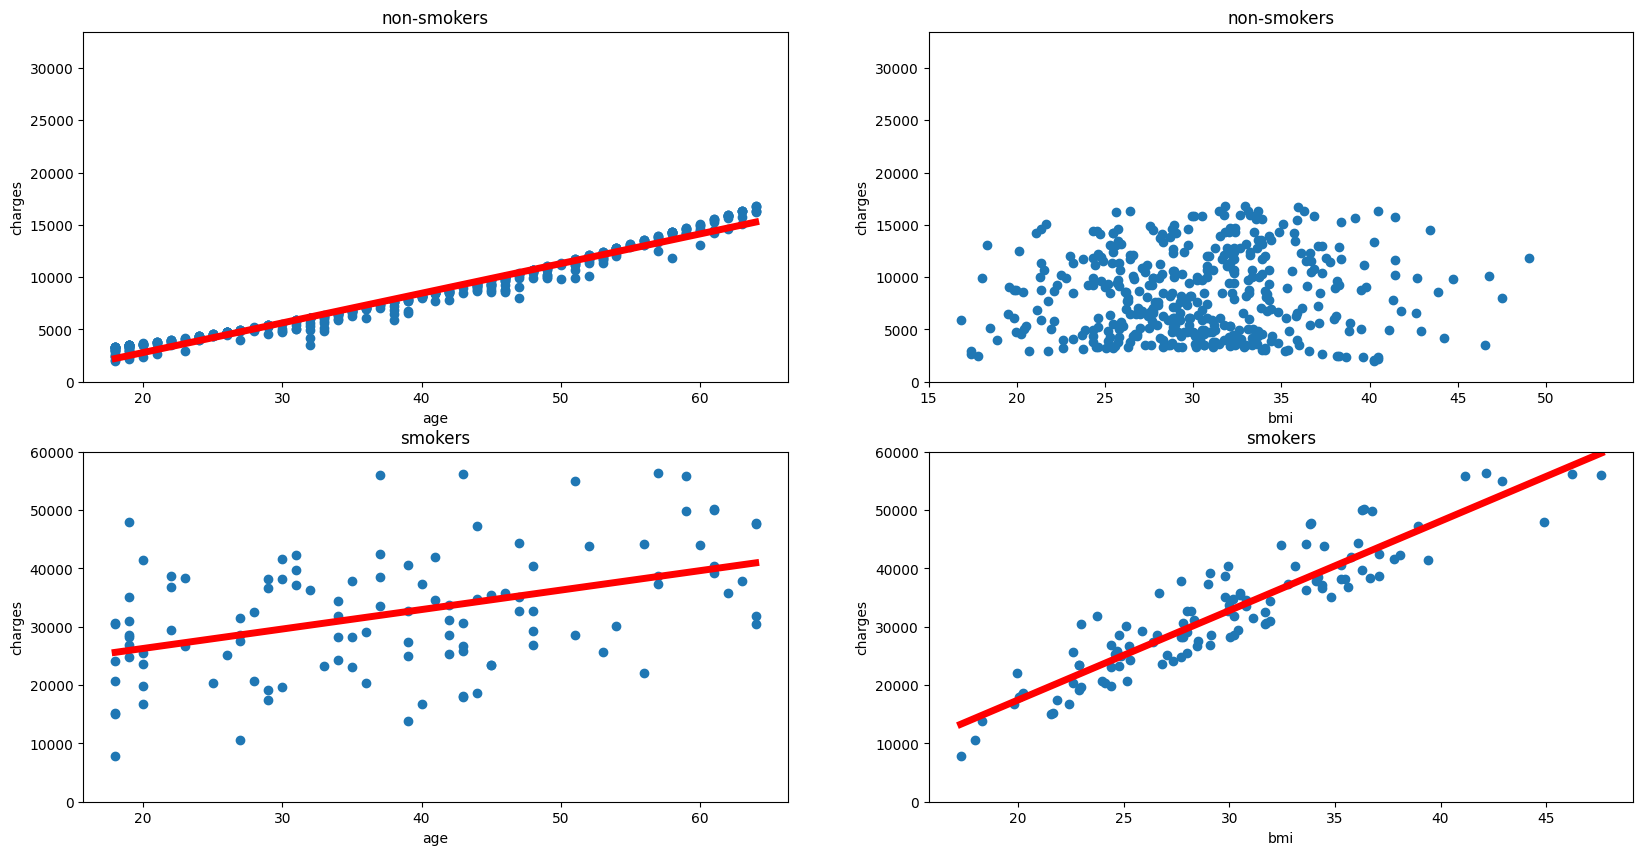

In [694]:
fig, ax = plt.subplots(2 , 2, figsize=(20, 10))

d1 = X_test[X_test[:,2] == 0]
ax[0][0].scatter(x=d1[:,0], y = y_pred[X_test[:,2] == 0])
ax[0][0].set_xlabel('age')
ax[0][0].set_ylabel('charges')
ax[0][0].set_title("non-smokers")
ax[0][0].set_ylim(0, y_test[X_test[:,2] == 0].max())
pltTrend(ax[0][0], d1[:,0],  y_pred[X_test[:,2] == 0])

ax[0][1].scatter(x=d1[:, 1], y =  y_pred[X_test[:,2] == 0])
ax[0][1].set_xlabel('bmi')
ax[0][1].set_ylabel('charges')
ax[0][1].set_title("non-smokers")
ax[0][1].set_ylim(0, y_test[X_test[:,2] == 0].max())


d1 = X_test[X_test[:,2] == 1]
ax[1][0].scatter(x=d1[:,0], y = y_pred[X_test[:,2] == 1])
ax[1][0].set_xlabel('age')
ax[1][0].set_ylabel('charges')
ax[1][0].set_title("smokers")
ax[1][0].set_ylim(0, y_test[X_test[:,2] == 1].max())
pltTrend(ax[1][0], d1[:,0],  y_pred[X_test[:,2] == 1])

ax[1][1].scatter(x=d1[:, 1], y =  y_pred[X_test[:,2] == 1])
ax[1][1].set_xlabel('bmi')
ax[1][1].set_ylabel('charges')
ax[1][1].set_title("smokers")
ax[1][1].set_ylim(0, y_test[X_test[:,2] == 1].max())
pltTrend(ax[1][1], x=d1[:, 1], y = y_pred[X_test[:,2] == 1])

savePlot('predictedVizualization2')


In [106]:
cd.describe()

count      536.000000
mean      -237.130241
std       5090.448774
min     -10501.098363
25%      -2129.147823
50%      -1091.652693
75%         24.007285
max      23118.041940
Name: charges, dtype: float64

In [228]:
#для y = w1x1 + w2y2
wSmokers3M = [280.26364501,   1366.7653961 , -20258.60494349]
wSmokers2D = [280.26364501,   1366.7653961]

wNoSmokersBackup = [ 2.55509903e+02, -4.82676502e+01,  1.26867744e-01] #finlim = 10**(-1)
wNoSmorkers2D = [255.62720555, -48.42761186]
wNoSmokers3D = [ 2.55509903e+02, -4.82676502e+01]
#для y = w1x1 + w2y2 + a0
wSM = [ 212.07302888, 1072.19350186]
a0SM = [-8115.85890909]

wNSM = [264.05053512,  -4.04603343]
a0NSM = [-1745.04973308]

wTotal = [  247.74217412,   180.75136809, 24485.12649644]
a0Total = [-6657.20448768]

#with polynomial
WTotalPoly = np.array([1.22160808e+00, 3.58137471e+00, 4.20214935e+01, 9.38440973e+00,
        2.73657446e+00, 1.68370548e+00, 1.36827129e+01, 9.05630595e-02,
        7.86933412e+02, 9.12337626e+00])
a0TotalPoly = np.array([1.36913679])

In [229]:
mean_squared_error(y_test, X_test @ WTotalPoly + a0TotalPoly)

25920554.949709564

In [230]:
w = WTotalPoly
a0 = a0TotalPoly

In [442]:
w = wNoSmokers3D.copy()

In [334]:
w = wSmokers3M.copy()

In [698]:
from sklearn.linear_model import SGDRegressor, ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron

In [292]:
clf = RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)

In [477]:
clf = LinearRegression()

In [281]:
clf = SGDRegressor(shuffle = True, loss="huber", max_iter =1000000000)


In [252]:
clf = ElasticNet()

In [731]:
clf = Lasso( max_iter =1000000000)

In [703]:
clf = Ridge()

In [732]:
model = clf.fit(A, y_train)

In [733]:
y_pred = model.predict(X_test_norm) 

In [734]:
model.score(X_test_norm, y_test) #.to_numpy()

0.7250153733164453

In [735]:
mean_squared_error(y_test,y_pred)

36148131.06102728

In [411]:
def augment_data(X, y, noise_std=0.03, n_times=12):
    X_new = []
    y_new = []
    for _ in range(n_times):
        noise = np.random.normal(0, noise_std*np.std(X, axis=0), X.shape)
        X_new.append(X + noise)
        y_new.append(y)
    return np.vstack(X_new), np.concatenate(y_new)

In [412]:
A, y_train = augment_data(A, y_train)

In [ ]:
wres = wSmokers3M